# Install package

In [1]:
# # install community
# library(devtools)

# devtools::install_github("SoloveyMaria/community")

# Calculate communication

In [2]:
# libraries
library(community)
library(data.table) #to read gz file
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday() 

In [3]:
input_dir <- "input_data/"#"../preprocessing/outs/"#
output_dir <- "computed_results/"

In [4]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/msolovey/miniconda3/envs/community/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=de_DE.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4      
 [5] purrr_1.0.2       readr_2.1.5       tidyr_1.3.1       tibble_3.2.1     
 [9] ggplot2_3.5.1     tidyverse_2.0.0   data.table_1.15.4 com

## Load data

To calculate interactions, we will need the following files: normalized `counts`, cell annotation file `anno_cells`, and a sample annotation file `anno_samples`.

The `counts` file contains normalizedcounts with genes in the rows and cell IDs in the columns.

The `anno_cells` file should contain columns named cell_ID, cell_type and sample_ID.

The `anno_sample` file should contain columns named sample_ID health_status (e.g. "healthy" or "AML") and case_or_control (e.g. "control" or "case").


We have converted human genes to their mouse one-to-one orthologs. The database for mouse can be loaded as `data("LR_database_mouse")`

In [5]:
data("LR_database")

In [6]:
# data("LR_database_mouse")
# print(str(LR_database_mouse))

In [7]:
# data("LR_database")
print(str(LR_database))

'data.frame':	6941 obs. of  21 variables:
 $ True_LR              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Pair.Name            : chr  "S100A10_TRPV6" "JAG2_NOTCH1" "DLL1_NOTCH1" "IGF1_IGF1R" ...
 $ Ligand               : chr  "S100A10" "JAG2" "DLL1" "IGF1" ...
 $ Ligand.Name          : chr  "S100 calcium binding protein A10" "jagged canonical Notch ligand 2" "delta like canonical Notch ligand 1" "insulin like growth factor 1" ...
 $ Receptor             : chr  "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
 $ Receptor.Name        : chr  "transient receptor potential cation channel subfamily V member 6" "notch receptor 1" "notch receptor 1" "insulin like growth factor 1 receptor" ...
 $ complex_pair         : chr  NA NA NA NA ...
 $ source               : chr  "P60903" "Q9Y219" "O00548" "P05019" ...
 $ target               : chr  "Q9H1D0" "P46531" "P46531" "P08069" ...
 $ is_directed          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ is_stimulation       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ is_inhibit

In [8]:
print(getwd())

[1] "/work/project/ladcol_006/community_rebuttal/melanoma/MEL_IMM_SS2_GSE120575/post_therapy/communication_analysis"


In [9]:
# # load counts
print("load counts")
counts <- fread(paste0(input_dir,"counts_lognorm.csv.gz"), header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
print(str(counts))

[1] "load counts"
'data.frame':	29399 obs. of  8451 variables:
 $ A10_P1_M15                       : num  0 0.805 0.0212 0 0 ...
 $ A10_P4_M15                       : num  0 0.65 0 0 0 ...
 $ A10_P5_M15                       : num  0 0.817 0 0 0 ...
 $ A11_P1_M15                       : num  0 0 0.0145 0.5403 0 ...
 $ A11_P2_M15                       : num  0 0.362 0 0 0 ...
 $ A11_P5_M15                       : num  0 0 0 0 0 ...
 $ A11_P6_M15                       : num  0 0.856 0 0 0 ...
 $ A12_P1_M15                       : num  0 0 0 0 0 ...
 $ A12_P2_M15                       : num  0 0.78 0 0 0 ...
 $ A12_P5_M15                       : num  0 0.722 0 0 0 ...
 $ A2_P1_M15                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A2_P2_M15                        : num  0 0 0 0 0 ...
 $ A2_P3_M15                        : num  0 0.319 0.512 0.319 0 ...
 $ A2_P6_M15                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A3_P2_M15                        : num  0 0 0 0 0 ...
 $ A3_P6_

In [10]:
# load cell annotation
print("load cell annotation")
anno_cells <- read.table(paste0(input_dir,"anno_cells_norm.txt")
                         ,sep = "\t"
                         ,header = TRUE
                         )
print(str(anno_cells))

[1] "load cell annotation"
'data.frame':	8451 obs. of  51 variables:
 $ sample_ID                                                                : chr  "Post_P1" "Post_P1" "Post_P1" "Post_P1" ...
 $ index                                                                    : chr  "A10_P1_M15" "A10_P4_M15" "A10_P5_M15" "A11_P1_M15" ...
 $ orig.ident                                                               : chr  "A10" "A10" "A10" "A11" ...
 $ nCount_RNA                                                               : num  462384 667914 1042777 677878 311263 ...
 $ nFeature_RNA                                                             : int  4142 4941 3594 4919 3991 4453 3107 3472 3962 4435 ...
 $ sample                                                                   : chr  "Post_P1" "Post_P1" "Post_P1" "Post_P1" ...
 $ treatment_response                                                       : chr  "Responder" "Responder" "Responder" "Responder" ...
 $ treatment                    

In [11]:
# load sample annotation
print("load sample annotation")
anno_samples <- read.table(paste0(input_dir,"anno_samples_norm.txt")
                           ,sep = "\t"
                           ,header = TRUE
                           )
print(str(anno_samples))

[1] "load sample annotation"
'data.frame':	28 obs. of  24 variables:
 $ patient_ID                                                               : chr  "P1" "P1" "P10" "P11" ...
 $ sample_ID                                                                : chr  "Post_P1" "Post_P1_2" "Post_P10" "Post_P11" ...
 $ response_status                                                          : chr  "R" "NR" "NR" "NR" ...
 $ sampling_time                                                            : chr  "post" "post" "post" "post" ...
 $ gender                                                                   : chr  "M" "M" "F" "F" ...
 $ age                                                                      : int  49 49 60 68 68 48 70 72 62 68 ...
 $ therapy                                                                  : chr  "CTLA4 (baseline); PD1 (post I and II)" "CTLA4 (baseline); PD1 (post I and II)" "PD1" "PD1" ...
 $ clinical_response                                                   

The ligand-receptor pair database is provided by the algorithm, but the user can also use a custom database. In this case, the custom database should have the columns named 'Ligand', 'Receptor' and 'Pair.Name'. 

In [12]:
colnames(counts) <- anno_cells$cell_ID
rownames(anno_cells) <- anno_cells$cell_ID

## Thresholds

When calculating the interactions, it is possible to set three threshold: 
- `threshold_celltype_size` is a threshold for the minimum number of cells that a cell type should contain (in one sample). If the number of cells in the cell type of interest in a particular sample is less or equal to the `threshold_celltype_size`, then we consider this cell type as missing in this sample. This threshold affects the relative cell type abundance parameter (rho). The default value for the `threshold_celltype_size` is 4. 
- `threshold_nr_active_cells` is a threshold for the minimum number of active cells in a cell type (in the sample of interest). A cell is considered as active (for a specific gene), if it is expressing this gene above the `threshold_expr`. If the number of active cells (for a specific gene) in a cell type is smaller or equal to the `threshold_nr_active_cells`, i.e. does not pass the threshold, then it is set to zero (in this sample). This threshold affects the relative active fraction (phi) parameter. The default value for the `threshold_nr_active_cells` is zero.
- `threshold_expr` is a threshold for an expression value of a gene in a cell. If an expression value af a gene in a cell is smaller or equal to the `threshold_expr` value, it will be set to zero. This threshold affects the relative active fraction (phi) and the relative mean expression (p) parameters. The default value for the `threshold_expr` is 0.05.

In [13]:
# set threshold of the cell type size
threshold_celltype_size <- 0
print("threshold_celltype_size >")
print(threshold_celltype_size)

[1] "threshold_celltype_size >"
[1] 0


In [14]:
# set threshold of the minimum number of active cells
threshold_nr_active_cells <- 0
print("threshold_nr_active_cells >")
print(threshold_nr_active_cells)

[1] "threshold_nr_active_cells >"
[1] 0


In [15]:
# set threshold of expression
threshold_expr <- 0.1
print("threshold_expr >")
print(threshold_expr)

[1] "threshold_expr >"
[1] 0.1


## Calculate interactions

In [16]:
# Renaming the cell_ID.1 column in anno_cells to "cell_ID"
colnames(anno_cells)[colnames(anno_cells) == "cell_ID.1"] <- "cell_ID"

In [17]:
table(anno_cells$sample_ID, anno_cells$cell_type)

            
               B  DC Macrophage  NK Plasma T CD4 naïve T CD8 eff T CD8 ex
  Post_P1      3   2          9   3      2           0         1       28
  Post_P1_2   21   1          3   2      3          18        11      132
  Post_P10     3  22          3   7     31          56        10      121
  Post_P11     1   2         24   1      0          58        35      140
  Post_P12     0   1          6   2      0           8         9      211
  Post_P13   117   3          7   0      2          38         2      117
  Post_P14    19   2         59   8      0          51        34       44
  Post_P15     5   9         23   2      0          25        35       61
  Post_P16     6  47         22  12      1          67         4      182
  Post_P17     6   1         17   0     30          24         2       92
  Post_P18    41   0          6   2      2          23         8       31
  Post_P19    81  23         26  38      2         102         7       38
  Post_P2      4   1     

In [18]:
print("calculate communication")
interactions = calculate_communication(counts = counts
                                       ,anno_samples = anno_samples
                                       ,anno_cells = anno_cells
                                       ,threshold_celltype_size = threshold_celltype_size
                                       ,threshold_nr_active_cells = threshold_nr_active_cells
                                       ,threshold_expr = threshold_expr
                                       ,lrp_database = LR_database
                                       )

# print(str(interactions))


[1] "calculate communication"


Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample Post_P1 does not contain cell type T CD4 naïve -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample Post_P10 does not contain cell type T CD8 naïve -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample Post_P11 does not contain cell type T CD8 naïve -- interactions for this cell type in this sample will get zero values.WARNING: sample Post_P11 does not contain cell type Plasma -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample Post_P12 does not contain cell type T CD8 naïve -- interactions for this cell type in this s

## Calculate general statistics

The `general_stat` function calculates for each interaction several parameters that will be used for the QC, visualization and the differential communication analysis. 

Following parameters for the QC step will be stored in the `anno_interactions` list:
- mean expression of a ligand in the active fraction of the sending cell type within the control cohort (`mean_e_s_l_control`) and within the case cohort (`mean_e_s_l_case`). 
- mean  expression of a receptor in the active fraction of the receiving cell type within the control cohort (`mean_e_r_r_control`) and within the case cohort (`mean_e_r_r_case`).

Following parameters for the visualization will be stored in the `anno_interactions` list:
- log2 fold change of `rho_s` between the cases and the controls (`log2FC_rho_s`). It shows for each interaction, how the cell type abundance of the sending cell type changed in the cases compared to the controls.
- log2 fold change of `rho_r` between the cases and the controls (`log2FC_rho_r_r`). It shows for each interaction, how the cell type abundance of the receiving cell type changed in the cases compared to the controls.
- log2 fold change of `rho` between the cases and the controls (`log2FC_rho`). It shows for each interaction, how the whole `rho` parameter changed in the cases compared to the controls.
- log2 fold change of `phi_l_s` between the cases and the controls (`log2FC_phi_l_s`). It shows for each interaction, how the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `phi_r_r` between the cases and the controls (`log2FC_phi_r_r`). It shows for each interaction, how the active fraction of the receptors in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `phi` between the cases and the controls (`log2FC_phi`). It shows for each interaction, how the whole `phi` parameter changed in the cases compared to the controls.
- log2 fold change of `p_l_s` between the cases and the controls (`log2FC_p_l_s`). It shows for each interaction, how the mean expression within the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `p_r_r` between the cases and the controls (`log2FC_p_r_r`). It shows for each interaction, how the mean expression within the active fraction of the receptor in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `p` between the cases and the controls (`log2FC_p`). It shows for each interaction, how the whole `p` parameter changed in the cases compared to the controls.

Following parameter for the differential communication analysis will be stored in the `anno_interactions` list:
- log2 fold change of `weights` between the cases and the controls (`log2FC_weights`). It shows for each interaction, how the whole interaction weight changed in the cases compared to the controls.





In [19]:
print("calculate general statistics")

interactions <- general_stat(comm_result = interactions
                                   ,verbose = FALSE
)
print(str(interactions$anno_interactions))

[1] "calculate general statistics"
'data.frame':	1077608 obs. of  19 variables:
 $ interaction_ID     : chr  "T CD8 naïve:S100A10_T CD8 naïve:TRPV6" "T CD8 naïve:JAG2_T CD8 naïve:NOTCH1" "T CD8 naïve:DLL1_T CD8 naïve:NOTCH1" "T CD8 naïve:IGF1_T CD8 naïve:IGF1R" ...
 $ ligand_gene_name   : chr  "S100A10" "JAG2" "DLL1" "IGF1" ...
 $ receptor_gene_name : chr  "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
 $ sending_cell_type  : chr  "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" ...
 $ receiving_cell_type: chr  "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" ...
 $ mean_e_s_l_control : num  0.315 0 0 0 0 ...
 $ mean_e_s_l_case    : num  0.4149 0.0338 0.0379 0 0.031 ...
 $ mean_e_r_r_control : num  0 0.138 0.138 0 0.138 ...
 $ mean_e_r_r_case    : num  0 0.242 0.242 0.0484 0.242 ...
 $ log2FC_rho_s       : num  2.17 2.17 2.17 2.17 2.17 ...
 $ log2FC_rho_r       : num  2.17 2.17 2.17 2.17 2.17 ...
 $ log2FC_rho         : num  6.44 6.44 6.44 6.44 6.44 ...
 $ log2FC_phi_s_l     : num

# QC

For the quality check, we use three filters: the **interaction weight filter**, the **presence per cohort filter** and the **ligand/receptor expression filter**. An interaction is considered of good quality, if it passes all three filters.

The **interaction weight filter** checks the log10 cumulative weight of the interaction. To pass this filter, the interaction needs to be greater than the `threshold_log10_cum_weight` threshold.

In [20]:
threshold_log10_cum_weight <-  0.02
print("threshold_log10_cum_weight >")
print(threshold_log10_cum_weight)

[1] "threshold_log10_cum_weight >"
[1] 0.02


The **presence per cohort filter** checks the fraction of samples in which an interaction was detected (i.e. has a non-zero value) in the control cohort and in the case cohort. To pass this filter, an interaction needs to have a greater value than the `threshold_frac_samples_per_condition` threshold either in the control cohort or in the case cohort or in both.

In [21]:
threshold_frac_samples_per_condition <- 0.3
print("threshold_frac_samples_per_condition >")
print(threshold_frac_samples_per_condition)

[1] "threshold_frac_samples_per_condition >"
[1] 0.3


The **ligand/receptor expression filter** checks the mean expression level of the ligand and the receptor of an interaction in the case and the control samples (separately). This filter uses a `threshold_log10meanexpr_per_condition` threshold.
For each interaction four values are checked:
- log10 mean expression of the ligand in sending cells in control samples
- log10 mean expression of the receptor in receiving cells in control samples
- log10 mean expression of the ligand in sending cells in case samples
- log10 mean expression of the receptor in receiving cells in case samples.


An interaction passes this filter if both its ligand and receptor pass the threshold either in control samples or in case samples or in both.

In [22]:
threshold_log10_meanexpr_per_condition <- 0.02
print("threshold_log10_meanexpr_per_condition >")
print(threshold_log10_meanexpr_per_condition)

[1] "threshold_log10_meanexpr_per_condition >"
[1] 0.02


A good quality interaction should pass all filters.

The `filter_interactions` function produces one plot for the **interaction weight filter**, two plots for the **presence per cohort filter** (one for the controls and one for the cases) and two plots for the **ligand/receptor expression filter** (one for the controls and one for the cases). It writes the selected threshold values in the `thresholds` list of the interaction object and stores the filtering results as boolean vectors (one per threshold) in the `anno_interactions` list. The function does not subset the data, so if you want to change the filtering parameters, you can re-define the thresholds and re-run the `filter_interactions` function.

[1] "filter weak interactions"


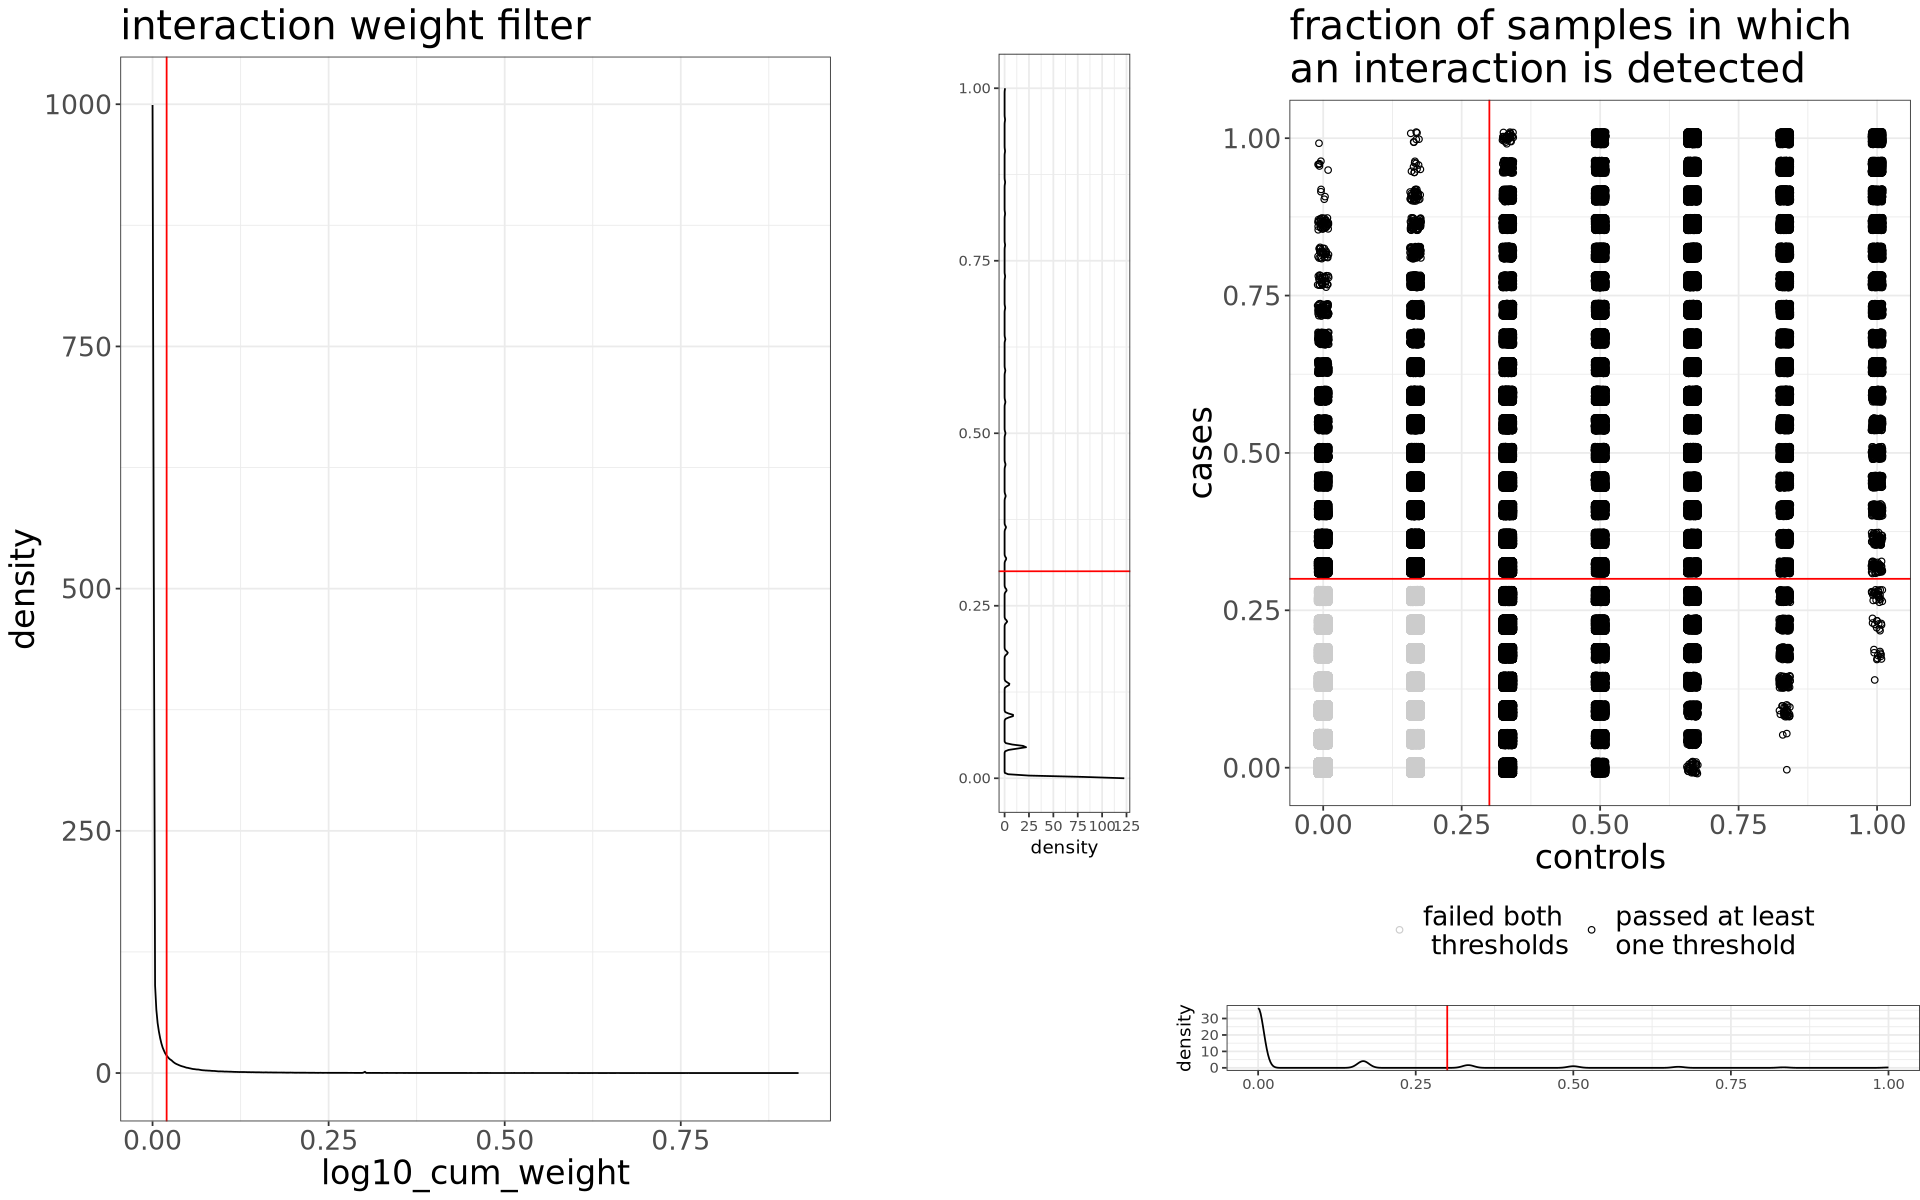

[1] "1009972 out of 1077608 interactions do not pass the thresholds for log10 cumulative interactions weight > 0.02 and fraction of expressing samples > 0.3 . Also  749358  interactions didn't pass the discrepancy filter.  In total, 1010054  bad quality interactions will be removed and 67554 good quality interactions will remain."


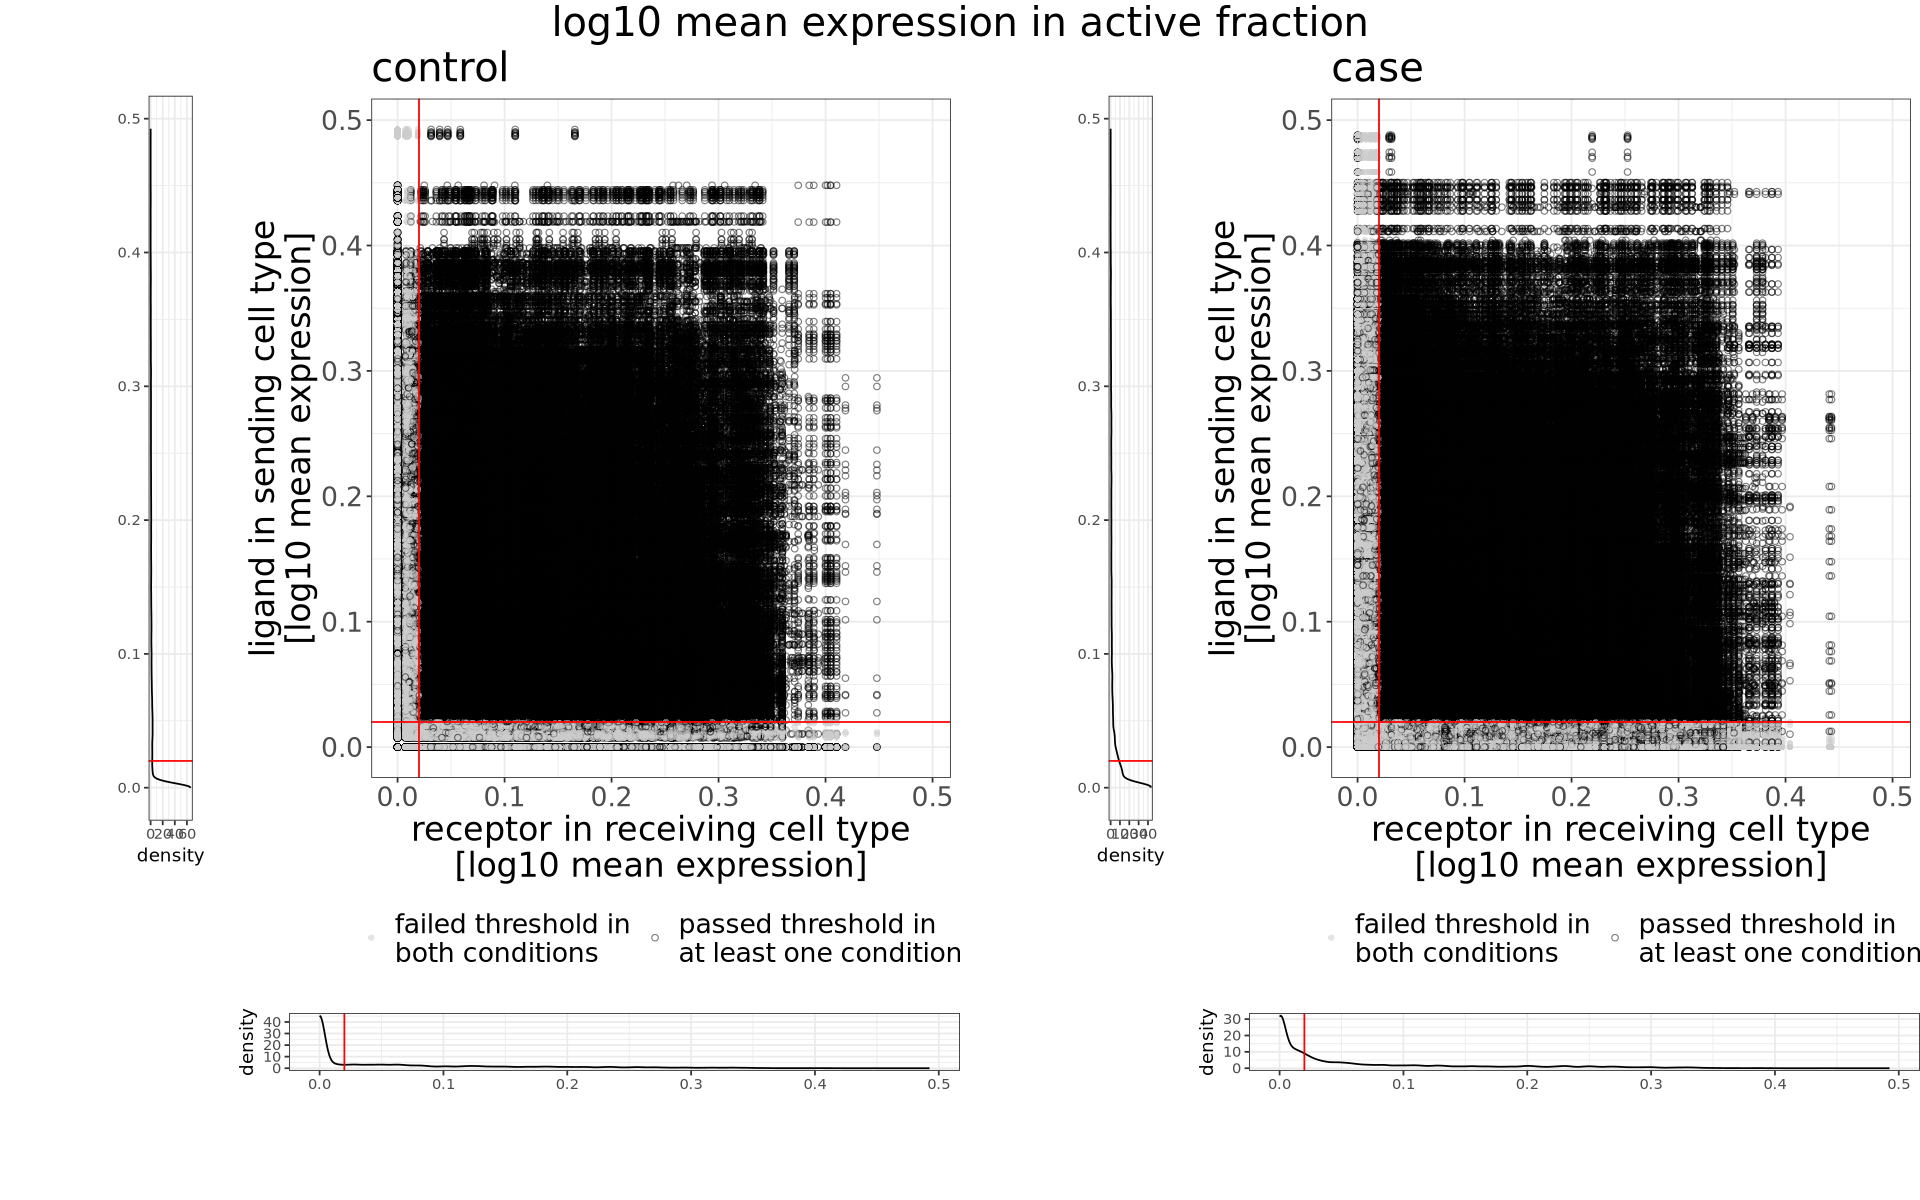

In [23]:
print("filter weak interactions")

options(repr.plot.height = 10
       ,repr.plot.width = 16)
interactions <- filter_interactions(comm_result = interactions
                             ,threshold_frac_samples_per_condition = threshold_frac_samples_per_condition
                             ,threshold_log10_cum_weight = threshold_log10_cum_weight
                             ,threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition
)

In [24]:
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

List of 6
 $ threshold_expr                        : num 0.1
 $ threshold_nr_active_cells             : num 0
 $ threshold_celltype_size               : num 0
 $ threshold_log10_cum_weight            : num 0.02
 $ threshold_frac_samples_per_condition  : num 0.3
 $ threshold_log10_meanexpr_per_condition: num 0.02
NULL
'data.frame':	1077608 obs. of  28 variables:
 $ interaction_ID                            : chr  "T CD8 naïve:S100A10_T CD8 naïve:TRPV6" "T CD8 naïve:JAG2_T CD8 naïve:NOTCH1" "T CD8 naïve:DLL1_T CD8 naïve:NOTCH1" "T CD8 naïve:IGF1_T CD8 naïve:IGF1R" ...
 $ ligand_gene_name                          : chr  "S100A10" "JAG2" "DLL1" "IGF1" ...
 $ receptor_gene_name                        : chr  "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
 $ sending_cell_type                         : chr  "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" ...
 $ receiving_cell_type                       : chr  "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" "T CD8 naïve" ...
 $ mean_e_s_l_control     

# Differential Communication

For calculating statistically significant differential interactions between the cases and the controls, we need to define an adjusted p-value threshold and the log2 fold change threshold. 

In [25]:
# Set up log2 fold change threshold. The default value is 1
threshold_log2FC <- 1
print(paste("[absolute] threshold_log2FC >",threshold_log2FC))

[1] "[absolute] threshold_log2FC > 1"


In [26]:
# Set up FDR threshold. The default value is 0.1
threshold_fdr <- 0.1
print(paste("threshold_fdr <",threshold_fdr))

[1] "threshold_fdr < 0.1"


The `test_diff` function stores the thresholds in the `thresholds` list of the interactions object.

The `test_diff` function calculates a p-value for each interaction using a Wilcoxon or t-test and adjusts for multiple testing using the FDR correction method. After that, the function checks whether the log2 fold change and the adjusted p-value thresholds were passed. An interaction is considered significant if it passes both thresholds. The `test_diff` function stores the results as a boolean vector to the `anno_interactions` list of the interactions object.



In [27]:
print("calculate differential communication")
interactions <- test_diff(comm_result = interactions
                          ,threshold_fdr = threshold_fdr
                          ,which_test = "t-test"
                          ,threshold_log2FC = threshold_log2FC
                          
                         )
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

[1] "calculate differential communication"
[1] "We have 5438 significantly differential interactions"
List of 8
 $ threshold_expr                        : num 0.1
 $ threshold_nr_active_cells             : num 0
 $ threshold_celltype_size               : num 0
 $ threshold_log10_cum_weight            : num 0.02
 $ threshold_frac_samples_per_condition  : num 0.3
 $ threshold_log10_meanexpr_per_condition: num 0.02
 $ threshold_fdr                         : num 0.1
 $ threshold_log2FC                      : num 1
NULL
'data.frame':	1077608 obs. of  33 variables:
 $ interaction_ID                            : chr  "T CD8 naïve:S100A10_T CD8 naïve:TRPV6" "T CD8 naïve:JAG2_T CD8 naïve:NOTCH1" "T CD8 naïve:DLL1_T CD8 naïve:NOTCH1" "T CD8 naïve:IGF1_T CD8 naïve:IGF1R" ...
 $ ligand_gene_name                          : chr  "S100A10" "JAG2" "DLL1" "IGF1" ...
 $ receptor_gene_name                        : chr  "TRPV6" "NOTCH1" "NOTCH1" "IGF1R" ...
 $ sending_cell_type                         : c

# Visualize

In [28]:
data("visualization_functions")

In [29]:
#load(paste0("computed_results/","interactions.RData"))

### Interactions of interest

In [30]:
inhibiroty_ligands <- c('CD274' #PDL1 -> PD1
                        ,'PDCD1LG2' # PDL2 -> PD1
                        ,'CD80' # -> CTLA4
                        ,'CD86' # -> CTLA4
                        ,'HLA-DRA' # MHC II -> LAG3
                        ,'HLA-DRB1' # MHC II -> LAG3
                        ,'HLA-DPB1' # MHC II -> LAG3
                        ,'LGALS9' # -> 'HAVCR2' (TIM3)
                        ,'CEACAM1' # -> 'HAVCR2' (TIM3)
                        ,'IGSF11' # -> 'VSIR' ('VISTA')
                        ,'PVR' # CD155 -> TIGIT
                       )
inhibiroty_ligands %in% LR_database$Ligand

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [31]:
inhibitory_receptors <- c('PDCD1' # <- CD274 / CD273 (PDCD1LG2)
                          ,'CTLA4' # <- CD80/CD86
                          ,'SELPLG' #('PSGL1') <- 'VSIR' (VISTA)
                          ,'LAG3' # <- MHCII
                          ,'HAVCR2' # (TIM3) <- LGALS9 / CEACAM1
                          ,'VSIR' # ('VISTA') <- VSIG3 (IGSF11) / LGALS9A
                          ,'TIGIT' # <- CD155 (PVR)
           )
inhibitory_receptors %in% LR_database$Receptor

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [32]:
# PDL1 PDL2 -> PD1
idx_good <- interactions$anno_interactions$passed_QC_filter
idx_sign <- interactions$anno_interactions$sign & !is.na(interactions$anno_interactions$sign)

idx_pd1 <- interactions$anno_interactions$receptor_gene_name %in% "PDCD1"
idx_pdl1 <- interactions$anno_interactions$ligand_gene_name %in% "CD274"
idx_pdl2 <- interactions$anno_interactions$ligand_gene_name %in% "PDCD1LG2"

idx_Tex_receiver <- interactions$anno_interactions$receiving_cell_type =='T CD8 ex'

idx_of_interest <- idx_good & idx_Tex_receiver & (idx_pdl1 | idx_pdl2) & idx_pd1
print(sum(idx_of_interest))
print(interactions$anno_interactions[idx_of_interest
                                     ,c("interaction_ID","log2FC_weights",'p.adj')])

[1] 12
                             interaction_ID log2FC_weights       p.adj
165250        T CD8 ex:CD274_T CD8 ex:PDCD1      3.5860010 0.214553317
165451     T CD8 ex:PDCD1LG2_T CD8 ex:PDCD1      1.2548703 0.541528810
242222       T cycling:CD274_T CD8 ex:PDCD1      4.0052229 0.324871353
242423    T cycling:PDCD1LG2_T CD8 ex:PDCD1     14.1065092 0.073534272
319194      Macrophage:CD274_T CD8 ex:PDCD1      1.1286886 0.974469494
319395   Macrophage:PDCD1LG2_T CD8 ex:PDCD1      3.2681658 0.479167254
627082       T reg act:CD274_T CD8 ex:PDCD1      5.0269393 0.452205251
627283    T reg act:PDCD1LG2_T CD8 ex:PDCD1     16.3871073 0.008565000
781026             Tfh:CD274_T CD8 ex:PDCD1     15.0057892 0.001030901
934970       T CD8 mem:CD274_T CD8 ex:PDCD1     -2.0019265 0.813650213
1011942    T CD4 naïve:CD274_T CD8 ex:PDCD1      4.3146232 0.538299044
1012143 T CD4 naïve:PDCD1LG2_T CD8 ex:PDCD1      0.4965797 0.793886766


In [33]:
# CD80 CD86 -> CTLA4
idx_good <- interactions$anno_interactions$passed_QC_filter
idx_sign <- interactions$anno_interactions$sign & !is.na(interactions$anno_interactions$sign)

idx_ctla4 <- interactions$anno_interactions$receptor_gene_name %in% "CTLA4"
idx_cd80 <- interactions$anno_interactions$ligand_gene_name %in% "CD80"
idx_cd86 <- interactions$anno_interactions$ligand_gene_name %in% "CD86"

idx_Tex_receiver <- interactions$anno_interactions$receiving_cell_type =='T CD8 ex'

idx_of_interest <- idx_good & idx_Tex_receiver & (idx_cd80 | idx_cd86) & idx_ctla4
print(sum(idx_of_interest))
print(interactions$anno_interactions[idx_of_interest
                                     ,c("interaction_ID","log2FC_weights",'p.adj')])

[1] 13
                         interaction_ID log2FC_weights        p.adj
168217     T CD8 ex:CD80_T CD8 ex:CTLA4       2.138710 7.151158e-01
168218     T CD8 ex:CD86_T CD8 ex:CTLA4      16.626577 4.658008e-05
245189    T cycling:CD80_T CD8 ex:CTLA4       3.907743 3.598093e-01
245190    T cycling:CD86_T CD8 ex:CTLA4      12.949568 8.855358e-03
322161   Macrophage:CD80_T CD8 ex:CTLA4       2.765112 3.596503e-01
322162   Macrophage:CD86_T CD8 ex:CTLA4       2.810139 4.159801e-01
476105            B:CD80_T CD8 ex:CTLA4      -0.591827 8.753658e-01
630049    T reg act:CD80_T CD8 ex:CTLA4       3.229254 4.308979e-01
630050    T reg act:CD86_T CD8 ex:CTLA4      15.933057 7.353427e-02
707022           DC:CD86_T CD8 ex:CTLA4       0.553638 8.806874e-01
783993          Tfh:CD80_T CD8 ex:CTLA4      14.467063 1.635759e-02
783994          Tfh:CD86_T CD8 ex:CTLA4      14.398983 7.353427e-02
1014909 T CD4 naïve:CD80_T CD8 ex:CTLA4      14.543973 4.746837e-02


In [34]:
# MHC II -> LAG3
idx_good <- interactions$anno_interactions$passed_QC_filter
idx_sign <- interactions$anno_interactions$sign & !is.na(interactions$anno_interactions$sign)

idx_lag3 <- interactions$anno_interactions$receptor_gene_name %in% "LAG3"
idx_HLADRA <- interactions$anno_interactions$ligand_gene_name %in% "HLA-DRA"
idx_HLADRB1 <- interactions$anno_interactions$ligand_gene_name %in% "HLA-DRB1"
idx_HLADPB1 <- interactions$anno_interactions$ligand_gene_name %in% "HLA-DPB1"

idx_Tex_receiver <- interactions$anno_interactions$receiving_cell_type =='T CD8 ex'

idx_of_interest <- idx_good & idx_Tex_receiver & (idx_HLADRA | idx_HLADRB1 | idx_HLADPB1) & idx_lag3
print(sum(idx_of_interest))
print(interactions$anno_interactions[idx_of_interest
                                     ,c("interaction_ID","log2FC_weights",'p.adj')])

[1] 38
                            interaction_ID log2FC_weights     p.adj
88461        Plasma:HLA-DPB1_T CD8 ex:LAG3    -0.63234442 0.5113615
88467        Plasma:HLA-DRB1_T CD8 ex:LAG3    -0.68142137 0.7456923
165433     T CD8 ex:HLA-DPB1_T CD8 ex:LAG3     1.67821870 0.3928407
165438      T CD8 ex:HLA-DRA_T CD8 ex:LAG3     1.50783817 0.3870328
165439     T CD8 ex:HLA-DRB1_T CD8 ex:LAG3     1.61818741 0.3966421
242405    T cycling:HLA-DPB1_T CD8 ex:LAG3     3.37145859 0.2754867
242410     T cycling:HLA-DRA_T CD8 ex:LAG3     2.92629037 0.2669774
242411    T cycling:HLA-DRB1_T CD8 ex:LAG3     2.87863812 0.2839872
319377   Macrophage:HLA-DPB1_T CD8 ex:LAG3     1.64200546 0.4653700
319382    Macrophage:HLA-DRA_T CD8 ex:LAG3     1.64454158 0.3081321
319383   Macrophage:HLA-DRB1_T CD8 ex:LAG3     1.51187146 0.4726810
396349     T helper:HLA-DPB1_T CD8 ex:LAG3    -0.06231565 0.7189958
396354      T helper:HLA-DRA_T CD8 ex:LAG3     0.43078460 0.4513895
396355     T helper:HLA-DRB1_T CD8 ex:LAG

In [35]:
# LGALS9 / CEACAM1 -> HAVCR2 (TIM3)
idx_good <- interactions$anno_interactions$passed_QC_filter
idx_sign <- interactions$anno_interactions$sign & !is.na(interactions$anno_interactions$sign)

idx_TIM3 <- interactions$anno_interactions$receptor_gene_name %in% "HAVCR2"
idx_LGALS9 <- interactions$anno_interactions$ligand_gene_name %in% "LGALS9"
idx_CEACAM1 <- interactions$anno_interactions$ligand_gene_name %in% "CEACAM1"

idx_Tex_receiver <- interactions$anno_interactions$receiving_cell_type =='T CD8 ex'

idx_of_interest <- idx_good & idx_Tex_receiver & (idx_LGALS9 | idx_CEACAM1 ) & idx_TIM3
print(sum(idx_of_interest))
print(interactions$anno_interactions[idx_of_interest
                                     ,c("interaction_ID","log2FC_weights",'p.adj')])

[1] 21
                             interaction_ID log2FC_weights      p.adj
165449      T CD8 ex:LGALS9_T CD8 ex:HAVCR2      2.3551785 0.28191561
168429     T CD8 ex:CEACAM1_T CD8 ex:HAVCR2      2.2604010 0.74818562
242421     T cycling:LGALS9_T CD8 ex:HAVCR2      1.8207151 0.34515847
245401    T cycling:CEACAM1_T CD8 ex:HAVCR2      5.2758204 0.49474529
319393    Macrophage:LGALS9_T CD8 ex:HAVCR2      1.7672912 0.36408519
322373   Macrophage:CEACAM1_T CD8 ex:HAVCR2      0.2377682 0.50842898
396365      T helper:LGALS9_T CD8 ex:HAVCR2      0.3416446 0.51136154
399345     T helper:CEACAM1_T CD8 ex:HAVCR2     -1.0205949 0.69771769
473337             B:LGALS9_T CD8 ex:HAVCR2     -0.3365924 0.64807480
476317            B:CEACAM1_T CD8 ex:HAVCR2     -1.3386228 0.46527312
550309            NK:LGALS9_T CD8 ex:HAVCR2     -0.7375532 0.98814174
627281     T reg act:LGALS9_T CD8 ex:HAVCR2      3.9867661 0.42242433
630261    T reg act:CEACAM1_T CD8 ex:HAVCR2      4.0772105 0.47953878
704253       

In [36]:
# CD155 -> TIGIT
idx_good <- interactions$anno_interactions$passed_QC_filter
idx_sign <- interactions$anno_interactions$sign & !is.na(interactions$anno_interactions$sign)

idx_TIGIT <- interactions$anno_interactions$receptor_gene_name %in% "TIGIT"
idx_CD155 <- interactions$anno_interactions$ligand_gene_name %in% "PVR"

idx_Tex_receiver <- interactions$anno_interactions$receiving_cell_type =='T CD8 ex'

idx_of_interest <- idx_good & idx_Tex_receiver & (idx_CD155) & idx_TIGIT
print(sum(idx_of_interest))
print(interactions$anno_interactions[idx_of_interest
                                     ,c("interaction_ID","log2FC_weights",'p.adj')])

[1] 4
                        interaction_ID log2FC_weights     p.adj
168254     T CD8 ex:PVR_T CD8 ex:TIGIT       1.344828 0.6985900
245226    T cycling:PVR_T CD8 ex:TIGIT      15.022888 0.0163419
322198   Macrophage:PVR_T CD8 ex:TIGIT       3.786635 0.1515780
1014946 T CD4 naïve:PVR_T CD8 ex:TIGIT       0.437325 0.7768160


### Volcano plot

In [37]:
# UPDATE THIS CODE IN THE VISUALIZATION_FUNCTIONS:RData
plot_vulcano <- function(my_interactions
                         ,colors = c("red3" # upregulated
                                     ,"gray90" # unsignificant
                                     ,"lightslateblue" # downregulated
                         )
                         ,font_size = 18
                        ,size_sign=1.5
                        ,size_notsign=0.5
                         ,alpha=0.25
                        ,xlim=NA
                        ,ylim=NA
                        )
{
        # good quality interactions
        idx_good <- my_interactions$anno_interactions$passed_QC_filter
        
        # threshold log2FC
        threshold_log2FC <- my_interactions$thresholds$threshold_log2FC
        
        # threshold p.adj
        threshold_p.adj <- my_interactions$thresholds$threshold_fdr
        
        df <- data.frame(log2FC = my_interactions$anno_interactions$log2FC_weights[idx_good]
                         ,y = -log10(my_interactions$anno_interactions$p.adj[idx_good])
                         ,significant = my_interactions$anno_interactions$sign[idx_good]
        )
        
        df$direction <- "unchanged"
        df$direction[df$significant & (df$log2FC > threshold_log2FC)] <- "up"
        df$direction[df$significant & (df$log2FC < -threshold_log2FC)] <- "down"
        df$direction <- factor(df$direction
                               ,levels = c("up"
                                           ,"unchanged"
                                           ,"down")
                               ,ordered = TRUE)
    print("number up-regulated:")
    print(sum(as.character(df$direction) == "up"))
    print("number down-regulated:")
    print(sum(as.character(df$direction) == "down"))
        
        xlab <- "log2 fold change"
        ylab <- "-log10 p.adj"
        
        if(length(xlim)==1){xlim <- c(-max(abs(df$log2FC)),max(abs(df$log2FC)))}
        if(length(ylim)==1){ylim <- c(0, max(df$y))}
        
        p <- ggplot()+
                geom_point(data = df
                    ,aes(x = log2FC
                         ,y = y
                         ,color = direction
                         ,size = significant
                        )
                           ,alpha = alpha
                           ,show.legend = FALSE)+
                scale_color_manual(values = colors)+
                scale_size_manual(values = c(size_notsign, size_sign))+
                guides(size = "none"
                       ,shape = "none")+
                xlab(xlab)+
                ylab(ylab)+
                xlim(xlim)+
                ylim(ylim)+
                theme_bw()+
                theme(text = element_text(size=font_size))+
                geom_vline(xintercept = threshold_log2FC
                           ,lty = 2
                           ,color = "gray")+
                geom_vline(xintercept = -threshold_log2FC
                           ,lty = 2
                           ,color = "gray")+
                geom_hline(yintercept = -log10(threshold_p.adj)
                           ,lty = 2
                           ,color = "gray")
        p
}


In [38]:
idx_highlight<-idx_good & idx_Tex_receiver & (
    ((idx_pdl1 | idx_pdl2) & idx_pd1
    ) | (
         (idx_cd80 | idx_cd86) & idx_ctla4
    ) | (
        (idx_HLADRA | idx_HLADRB1 | idx_HLADPB1) & idx_lag3
    ) | (
        (idx_LGALS9 | idx_CEACAM1 ) & idx_TIM3
        ) | (
        idx_CD155 & idx_TIGIT
        )
)
sum(idx_highlight)

[1] 88

In [39]:
sum(idx_sign)

[1] 5438

     log2FC        y                    interaction_ID                  pathway
1  16.62658 4.331800      T CD8 ex:CD86_T CD8 ex:CTLA4     CD80 / CD86 -> CTLA4
2  14.10651 1.133510 T cycling:PDCD1LG2_T CD8 ex:PDCD1       PDL1 / PDL2 -> PD1
3  12.94957 2.052794     T cycling:CD86_T CD8 ex:CTLA4     CD80 / CD86 -> CTLA4
4  15.02289 1.786697      T cycling:PVR_T CD8 ex:TIGIT           CD155 -> TIGIT
5  16.38711 2.067273 T reg act:PDCD1LG2_T CD8 ex:PDCD1       PDL1 / PDL2 -> PD1
6  15.93306 1.133510     T reg act:CD86_T CD8 ex:CTLA4     CD80 / CD86 -> CTLA4
7  15.00579 2.986783          Tfh:CD274_T CD8 ex:PDCD1       PDL1 / PDL2 -> PD1
8  14.46706 1.786281           Tfh:CD80_T CD8 ex:CTLA4     CD80 / CD86 -> CTLA4
9  14.39898 1.133510           Tfh:CD86_T CD8 ex:CTLA4     CD80 / CD86 -> CTLA4
10 12.93851 1.133510 T CD8 mem:CEACAM1_T CD8 ex:HAVCR2 LGALS9 / CEACAM1 -> TIM3
11 14.54397 1.323596   T CD4 naïve:CD80_T CD8 ex:CTLA4     CD80 / CD86 -> CTLA4
[1] "number up-regulated:"
[1] 4225
[1] 

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


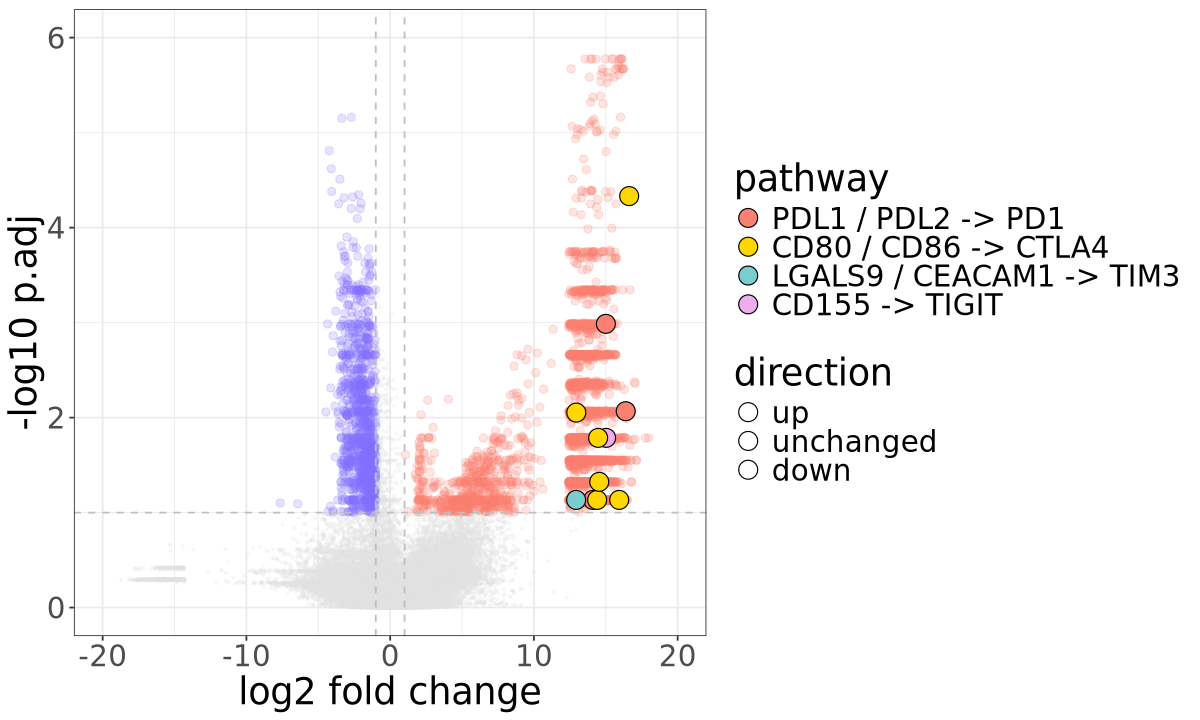

In [40]:
options(repr.plot.height=6
       ,repr.plot.width=10)

df_inhibition <- data.frame(log2FC = interactions$anno_interactions$log2FC_weights[idx_highlight & idx_sign]
                         ,y = -log10(interactions$anno_interactions$p.adj[idx_highlight & idx_sign])
                         ,interaction_ID = interactions$anno_interactions$interaction_ID[idx_highlight & idx_sign]
        )
df_inhibition$pathway <- sapply(df_inhibition$interaction_ID
                               ,function(int){
                                   idx_pdl1_pdl2_pd1 <- idx_good & idx_Tex_receiver & (idx_pdl1 | idx_pdl2) & idx_pd1
                                   idx_cd80_cd86_ctla4 <- idx_good & idx_Tex_receiver & (idx_cd80 | idx_cd86) & idx_ctla4
                                   idx_mhc2_lag3 <- idx_good & idx_Tex_receiver & (idx_HLADRA | idx_HLADRB1 | idx_HLADPB1) & idx_lag3
                                   idx_lgals9_ceacam1_tim3 <- idx_good & idx_Tex_receiver & (idx_LGALS9 | idx_CEACAM1 ) & idx_TIM3
                                   idx_tigit <- idx_good & idx_Tex_receiver & idx_CD155 & idx_TIGIT
                                   
                                   ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_pdl1_pdl2_pd1]
                                         ,'PDL1 / PDL2 -> PD1'
                                         ,ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_cd80_cd86_ctla4]
                                                ,'CD80 / CD86 -> CTLA4'
                                                ,ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_mhc2_lag3]
                                                       ,'MKC-II -> LAG3'
                                                       ,ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_lgals9_ceacam1_tim3]
                                                              ,'LGALS9 / CEACAM1 -> TIM3'
                                                              ,'CD155 -> TIGIT')
                                                       )
                                                )
                                         )
                                   })
df_inhibition$pathway <- factor(df_inhibition$pathway
                               ,levels=c('PDL1 / PDL2 -> PD1'
                                         ,'CD80 / CD86 -> CTLA4'
                                         ,'MKC-II -> LAG3'
                                         ,'LGALS9 / CEACAM1 -> TIM3'
                                         ,'CD155 -> TIGIT'
                                        )
                                ,ordered=TRUE
                               )
color_inhibition <- c('PDL1 / PDL2 -> PD1' = 'salmon'
                     ,'CD80 / CD86 -> CTLA4' = 'gold'
                     ,'MKC-II -> LAG3' = 'darkolivegreen1'
                     ,'LGALS9 / CEACAM1 -> TIM3'='darkslategray3'
                     ,'CD155 -> TIGIT'='plum2')
print(df_inhibition)

p <- plot_vulcano(interactions
             ,colors = c("salmon" # upregulated
                                     ,"gray90" # unsignificant
                                     ,"lightslateblue" # downregulated
                         )
             ,alpha=0.2
            ,ylim=c(0,6)
            ,xlim=c(-20,20)
             ,font_size=22
             ,size_sign=2
            )+
geom_point(data=df_inhibition
              ,aes(x= log2FC
                   ,y= y
                   ,fill=pathway
                   )
           ,shape = 21
           ,size=5
           ,show.legend = TRUE
          )+
scale_fill_manual(values = color_inhibition)

p

ggsave('./computed_results/volcano.png',plot=p, width=9, height = 5, dpi= 300)

In [41]:
idx_padj_2.5 <- df_inhibition$y > 2
print(sum(idx_padj_2.5))
print(df_inhibition[idx_padj_2.5,])

[1] 4
    log2FC        y                    interaction_ID              pathway
1 16.62658 4.331800      T CD8 ex:CD86_T CD8 ex:CTLA4 CD80 / CD86 -> CTLA4
3 12.94957 2.052794     T cycling:CD86_T CD8 ex:CTLA4 CD80 / CD86 -> CTLA4
5 16.38711 2.067273 T reg act:PDCD1LG2_T CD8 ex:PDCD1   PDL1 / PDL2 -> PD1
7 15.00579 2.986783          Tfh:CD274_T CD8 ex:PDCD1   PDL1 / PDL2 -> PD1


### Network plot

In [42]:
library(igraph)
library(RColorBrewer)


Attaching package: ‘igraph’


The following objects are masked from ‘package:lubridate’:

    %--%, union


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [43]:
layout <- data.frame(x=c(3.2069922,-1.2161491,-1.9617022,2.4307382,-0.2710599,-0.5583566,1.2712535,0.2514795,0.7942769,-1.4967018,1.9317267,3.4501475,0.8700107,2.5750440)
                    ,y=c(-0.8311973,-0.2631280,-1.8159019,-2.0842185,-4.5613155,-2.3384033,-4.9848652,0.2139508,-3.1342961,-3.6437823,-3.7840183,-3.2229881,-1.2820113,0.2139508)
                    ,node=c('NK','T CD8 naïve','T helper','Tfh','T reg act','DC','T cycling','T CD4 naïve','T CD8 ex','T CD8 mem','Macrophage','T CD8 eff','B','Plasma')
                    )
layout

x,y,node
<dbl>,<dbl>,<chr>
3.2069922,-0.8311973,NK
-1.2161491,-0.2631280,T CD8 naïve
-1.9617022,-1.8159019,T helper
2.4307382,-2.0842185,Tfh
-0.2710599,-4.5613155,T reg act
-0.5583566,-2.3384033,DC
1.2712535,-4.9848652,T cycling
0.2514795,0.2139508,T CD4 naïve
0.7942769,-3.1342961,T CD8 ex


In [44]:
network_plot_pathway <- function(interactions
                                ,case_or_control # 'case' or 'control'
                                 ,layout
                                 ,pathway_color=NA
                                 ,edge_tickness_magnitude = 100
                                 ,vertex.label.cex=1.5
                                 ,vertex_size=15
                                ){
    cell_types <- unique(interactions$anno_interactions$sending_cell_type)
    idx_samples <- interactions$anno_samples$case_or_control == case_or_control
    
    edges_full<-data.frame(source=interactions$anno_interactions$sending_cell_type[idx_highlight]
                      ,target=interactions$anno_interactions$receiving_cell_type[idx_highlight]
                      ,weight=rowMeans(interactions$weights[idx_highlight,idx_samples])
                      ,interaction_ID = interactions$anno_interactions$interaction_ID[idx_highlight]
                     )
    edges_full$pathway <- sapply(edges_full$interaction_ID
                                   ,function(int){
                                       idx_pdl1_pdl2_pd1 <- idx_good & idx_Tex_receiver & (idx_pdl1 | idx_pdl2) & idx_pd1
                                       idx_cd80_cd86_ctla4 <- idx_good & idx_Tex_receiver & (idx_cd80 | idx_cd86) & idx_ctla4
                                       idx_mhc2_lag3 <- idx_good & idx_Tex_receiver & (idx_HLADRA | idx_HLADRB1 | idx_HLADPB1) & idx_lag3
                                       idx_lgals9_ceacam1_tim3 <- idx_good & idx_Tex_receiver & (idx_LGALS9 | idx_CEACAM1 ) & idx_TIM3
                                       idx_tigit <- idx_good & idx_Tex_receiver & idx_CD155 & idx_TIGIT
                                       
                                       ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_pdl1_pdl2_pd1]
                                             ,'PDL1 / PDL2 -> PD1'
                                             ,ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_cd80_cd86_ctla4]
                                                    ,'CD80 / CD86 -> CTLA4'
                                                    ,ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_mhc2_lag3]
                                                           ,'MKC-II -> LAG3'
                                                           ,ifelse(int %in% interactions$anno_interactions$interaction_ID[idx_lgals9_ceacam1_tim3]
                                                                  ,'LGALS9 / CEACAM1 -> TIM3'
                                                                  ,'CD155 -> TIGIT')
                                                           )
                                                    )
                                             )
                                       })
    # take mean weight for each pathway
    combintation_ct_pathway <- edges_full[!duplicated(edges_full[,c('source','pathway')]),c('source','pathway')]
    edges<-as.data.frame(matrix(nrow=nrow(combintation_ct_pathway)
                                ,ncol=ncol(edges_full)
                                ,NA
                               ))
    colnames(edges)<-colnames(edges_full)
    for(i in 1:nrow(combintation_ct_pathway)){
        ct <- combintation_ct_pathway$source[i]
        p <- combintation_ct_pathway$pathway[i]
        
        idx_ct <- edges_full$source == ct
        idx_p <- edges_full$pathway == p
    
        edges$source[i]<-ct
        edges$target[i]<-edges_full[idx_ct & idx_p,'target'][1]
        edges$weight[i]<-mean(edges_full[idx_ct & idx_p,'weight'])
        edges$pathway[i]<-p
    
    }
    
    edges$weight <- edges$weight + 0.000000000001
    
    g<-graph_from_data_frame(d=edges
                             ,vertices=cell_types
                             ,directed=TRUE
                             )
    E(g)$weight<-edges$weight
    if(is.na(pathway_color)){
        pathway_color<- c('PDL1 / PDL2 -> PD1' = 'salmon'
                         ,'CD80 / CD86 -> CTLA4' = 'gold'
                         ,'MKC-II -> LAG3' = 'darkolivegreen1'
                         ,'LGALS9 / CEACAM1 -> TIM3'='darkslategray3'
                         ,'CD155 -> TIGIT'='plum2')
    }
    
    E(g)$color<-pathway_color[edges$pathway]
    
    V(g)$size<-vertex_size

    layout <- layout[match(V(g)$name,layout$node),]
    layout<-as.matrix(layout[,1:2])
    
    plot(g
        ,edge.width=E(g)$weight * edge_tickness_magnitude
         ,edge.arrow.size=0
         ,vertex.label.cex=vertex.label.cex
         ,vertex.label.color='black'
         ,vertex.color=NA
         ,vertex.frame.color=NA
         ,layout=layout
    )
                                }



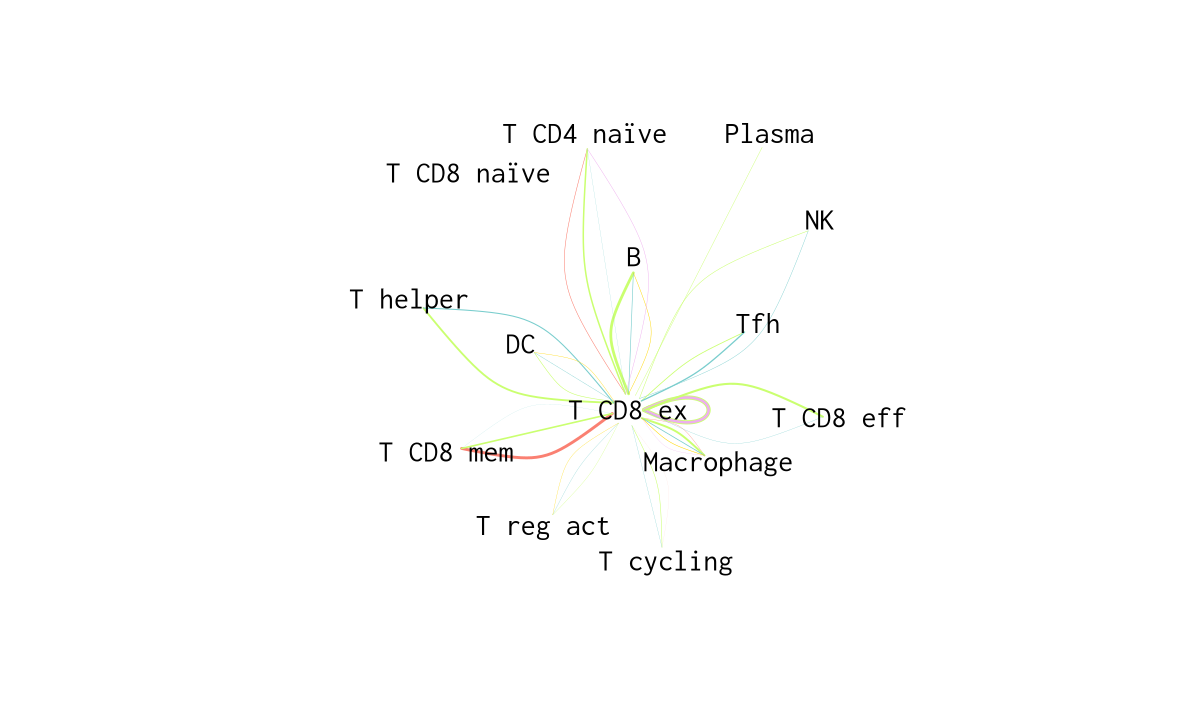

In [45]:
network_plot_pathway(interactions
                    ,'control'
                    ,layout)

In [46]:
dev.off()
png("./computed_results/network_control.png",width = 1600, height = 1600, res = 300)
network_plot_pathway(interactions
                    ,'control'
                    ,layout)
dev.off()

null device 
          1

png 
  2

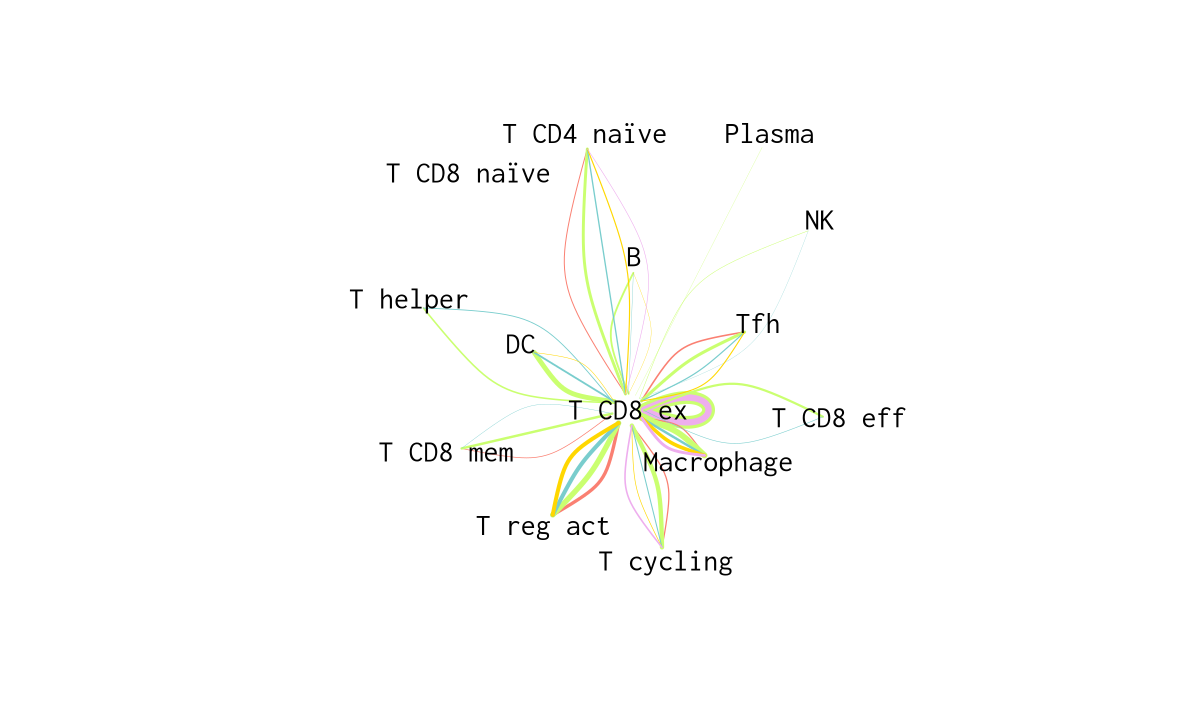

In [47]:
network_plot_pathway(interactions
                    ,'case'
                    ,layout)

In [48]:

dev.off()
png("./computed_results/network_case.png",width = 1600, height = 1600, res = 300)
network_plot_pathway(interactions
                    ,'case'
                    ,layout)
dev.off()

null device 
          1

png 
  2

# Export

In [49]:
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'computed_results' already exists”


In [50]:
write.csv(interactions$weights,paste0(output_dir,"community_weights.csv"))

In [51]:
write.csv(interactions$anno_interactions,paste0(output_dir,"community_anno_interactions.csv"))

In [ ]:
print("save interactions.RData")
save(interactions, file = paste0(output_dir,"interactions.RData"))

[1] "save interactions.RData"


In [ ]:
sessionInfo()